# Flight Price Prediction Project:

### STATEMENT: Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on

1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)
So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

## Importing datasets:


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all rows
pd.set_option('display.max_rows',None)

#importing dataset
df = pd.read_csv("Flight.csv") #Reading csv file
df.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,IndiGo,05-05-2022,Goa,Ahmedabad,01:20,03:00,Non stop,"6,471"
1,SpiceJet,05-05-2022,Goa,Ahmedabad,07:50,09:30,Non stop,"6,471"
2,Go First,05-05-2022,Goa,Ahmedabad,21:00,22:30,Non stop,"6,471"
3,IndiGo,05-05-2022,Goa,Ahmedabad,00:10,07:40,1 stop via Mumbai,"6,471"
4,IndiGo,05-05-2022,Goa,Ahmedabad,20:15,21:55,Non stop,"12,771"


#### Since Price is my target and it seems to be continuous feature so this particular problem is Regression Problem.

# Features Information:

Airline: The name of the airline.

Journey_date: The date of the journey

From: The source from which the service begins.

To: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

D_Time: The time when the journey starts from the source.

A_Time: Time of arrival at the destination.

Stops: Total stops between the source and destination.

Price: The price of the ticket

## Pre-processing and EDA

In [3]:
#Checking shape of my dataset
df.shape

(4342, 8)

In [4]:
#Checking all column names
df.columns

Index(['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops',
       'Price'],
      dtype='object')

In [5]:
#Checking the data types of all columns
df.dtypes

Airline         object
Journey_date    object
From            object
To              object
Dtime           object
Atime           object
Stops           object
Price           object
dtype: object

In [6]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4342 entries, 0 to 4341
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       4342 non-null   object
 1   Journey_date  4342 non-null   object
 2   From          4342 non-null   object
 3   To            4342 non-null   object
 4   Dtime         4342 non-null   object
 5   Atime         4342 non-null   object
 6   Stops         4342 non-null   object
 7   Price         4342 non-null   object
dtypes: object(8)
memory usage: 271.5+ KB


####  There is no nan values in the dataset.But i have to convert journey_date, d_time and a_time columns from object to datetime type data.

In [7]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

IndiGo                    1809
Go First                   545
Vistara                    521
SpiceJet                   487
Air India                  444
AirAsia                    329
Alliance Air                35
SpiceJet, IndiGo            30
IndiGo, Air India           24
IndiGo, SpiceJet            19
Air India, IndiGo           14
AirAsia, IndiGo             10
Star Air                     8
Air India, SpiceJet          8
IndiGo, AirAsia              7
Go First, IndiGo             6
Air India, AirAsia           6
SpiceJet, Go First           6
IndiGo, Alliance Air         4
Go First, SpiceJet           4
Vistara, SpiceJet            4
Alliance Air, IndiGo         4
Vistara, IndiGo              3
SpiceJet, Air India          3
Vistara, Air India           2
Air India, Go First          2
SpiceJet, Alliance Air       2
IndiGo, Vistara              1
SpiceJet, Vistara            1
IndiGo, Star Air             1
AirAsia, SpiceJet            1
Go First, Air India          1
AirAsia,

#### Above are the value counts of each column.In Airline and Stops column we have to use grouping to get better understanding on the feature.

In [8]:
#Grouping Airlines column for multiple airlines:

df["Airline"].replace(("IndiGo, Spicejet","Spicejet, IndiGo","IndiGo, Air India","Spicejet, Air India","Go First, IndiGo","Air India, IndiGo","IndiGo, Vistara","AirAsia, IndiGo","Go First, Air India","IndiGo, Go First","Vistara, IndiGo","Spicejet, Go First","IndiGo, AirAsia","Spicejet, Vistara","IndiGo, Star Air","Vistara, Go First","Air India, Go First","Go First, Vistara","Vistara, Air India","Go First, Spicejet","Air India, Vistara","Star Air, IndiGo"),"Multiple Airlines",inplace=True)

In [9]:
#Checking the value counts of Airline column
df.Airline.value_counts()

IndiGo                    1809
Go First                   545
Vistara                    521
SpiceJet                   487
Air India                  444
AirAsia                    329
Multiple Airlines           71
Alliance Air                35
SpiceJet, IndiGo            30
IndiGo, SpiceJet            19
Star Air                     8
Air India, SpiceJet          8
Air India, AirAsia           6
SpiceJet, Go First           6
Alliance Air, IndiGo         4
IndiGo, Alliance Air         4
Vistara, SpiceJet            4
Go First, SpiceJet           4
SpiceJet, Air India          3
SpiceJet, Alliance Air       2
AirAsia, Air India           1
SpiceJet, Vistara            1
AirAsia, SpiceJet            1
Name: Airline, dtype: int64

In [10]:
#Grouping Stops column 

df["Stops"].replace(("1 stop via Jalgaon","1 stop via Mumbai","1 stop via Hyderabad","1 stop via Bengaluru","1 stop via New Delhi","1 stop via Ahmedabad","1 stop via Goa","1 stop via Pune","1 stop via Lucknow","1 stop via Ranchi","1 stop via Kolkata","1 stop via Chennai","1 stop via Chandigarh","1 stop via Kochi","1 stop via Jaipur","2 stop via New Delhi,Chennai","1 stop via Nagpur","1 stop via Amritsar","1 stop via Patna","1 stop via Surat","1 stop via Guwahati","1 stop via Vadodara","1 stop via Udaipur","1 stop via Indore","1 stop via Bhavnagar","1 stop via Madurai","1 stop via Bagdogra","1 stop via Varanasi","1 stop via Srinagar","1 stop via Mangalore","1 stop via Jammu","1 stop via Vijayawada","1 stop via Jodhpur","1 stop via Kalaburagi","1 stop via Aurangabad","1 stop via Rajkot","1 stop via Mysore","1 stop via Bhopal","1 stop via Tirupati","1 stop via Dehradun","1 stop via Visakhapatnam"),"1 Stop",inplace=True)

In [11]:
#Grouping Stops column
df["Stops"].replace(("2 stop via Surat,New Delhi","2 stop via Hyderabad,Vijayawada","2 stop via New Delhi,Hyderabad","2 stop via Hyderabad,New Delhi","2 stop via Mumbai,Hyderabad","2 stop via Mumbai,New Delhi","2 stop via Hyderabad,Mumbai","2 stop via Bengaluru,Hyderabad","2 stop via Hyderabad,Bengaluru","2 stop via New Delhi,Mumbai","2 stop via Varanasi,Bengaluru","2 stop via New Delhi,Chandigarh","2 stop via Chandigarh,New Delhi","2 stop via Chandigarh,Ahmedabad","2 stop via Ranchi,New Delhi","2 stop via Ranchi,Bengaluru","2 stop via Ahmedabad,Chandigarh","2 stop via Chandigarh,Srinagar","2 stop via Bengaluru,Ranchi","2 stop via Jammu,Srinagar","2 stop via Kochi,Mumbai","2 stop via New Delhi,Varanasi","2 stop via Hyderabad,Mysore","2 stop via Mumbai,Ranchi","2 stop via Chennai,Ranchi","2 stop via Hyderabad,Pune","2 stop via Nagpur,Pune","2 stop via Chennai,Hyderabad","2 stop via Pune,Hyderabad","2 stop via Hyderabad,Nanded","2 stop via Vijayawada,Hyderabad","2 stop via Hyderabad,Goa","2 stop via Nanded,Hyderabad","2 stop via Mumbai,Chandigarh","2 stop via Belgaum,Hyderabad","2 stop via Chennai,Jaipur","2 stop via Hyderabad,Chennai","2 stop via Hyderabad,Tirupati","2 stop via Srinagar,Chandigarh","2 stop via Mangalore,Mumbai","2 stop via Amritsar,Srinagar","2 stop via Goa,Hyderabad","2 stop via Mysore,Hyderabad","2 stop via New Delhi,Bhopal","2 stop via New Delhi,Bhopal","2 stop via Surat,Hyderabad","2 stop via Surat,Hyderabad","2 stop via Surat,Hyderabad","2 stop via New Delhi,Chennai"),"2 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("3 stop via Hyderabad,New Delhi,Amritsar","3 stop via Hyderabad,New Delhi,Bengaluru","3 stop via Hyderabad,New Delhi,Bengaluru","3 stop via Bengaluru,New Delhi,Indore","3 stop via Hyderabad,New Delhi,Chennai","3 stop via New Delhi,Indore,Mumbai","3 stop via New Delhi,Indore,Mumbai","3 stop via Goa,New Delhi,Hyderabad","3 stop via Mumbai,Aurangabad,New Delhi","3 stop via Chandigarh,New Delhi,Ranchi","3 stop via New Delhi,Aurangabad,Mumbai","3 stop via Leh,Jammu,Srinagar","3 stop via Bhubaneswar,New Delhi,Hyderabad","3 stop via Hyderabad,New Delhi,Mumbai","3 stop via Indore,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Jaipur","3 stop via Hyderabad,New Delhi,Goa","3 stop via Ahmedabad,New Delhi,Hyderabad","3 stop via Belgaum,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Bhopal","3 stop via Mumbai,New Delhi,Hyderabad"),"3 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("4 stop via Patna,Kolkata,New Delhi,Hyderabad","4 stop via Hyderabad,New Delhi,Surat,Bhubaneswar","4 stop via Mysore,Kochi,New Delhi,Hyderabad","4 stop via Hyderabad,New Delhi,Raipur,Visakhapatnam","4 stop via Nasik,Pune,Bhopal,New Delhi","4 stop via Bhubaneswar,Surat,New Delhi,Hyderabad","4 stop via Nasik,Pune,New Delhi,Hyderabad"),"4 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("5 stop via Hyderabad,New Delhi,Nagpur,Raipur,Visakhapatnam"),"5 Stops",inplace=True)

In [12]:
#Checking the value counts of Stops column
df.Stops.value_counts()

Non stop                                     2762
1 Stop                                       1341
2 Stops                                       130
3 Stops                                        21
1 stop via Shirdi                              14
2 stop via Indore,Hyderabad                    12
2 stop via Shirdi,Hyderabad                    10
1 stop via Coimbatore                           9
1 stop via Darbhanga                            7
1 stop via Gwalior                              6
2 stop via Mumbai,Bengaluru                     4
3 stop via Hyderabad,New Delhi,Kolkata          4
2 stop via Pune,New Delhi                       3
2 stop via Chandigarh,Jaipur                    3
2 stop via Pune,Visakhapatnam                   2
2 stop via Pune,Bengaluru                       2
2 stop via Leh,Srinagar                         2
1 stop via Raipur                               1
3 stop via Aurangabad,New Delhi,Hyderabad       1
1 stop via Kozhikode                            1


In [13]:
#Let me assign values for Stops column
df.replace({"Non stop": 0,"1 Stop": 1,"2 Stops": 2,"3 Stops": 3,"4 Stops": 4,"5 Stops": 5 },inplace = True)

In [14]:
#Checking the value counts of Stops column again
df.Stops.value_counts()

0                                            2762
1                                            1341
2                                             130
3                                              21
1 stop via Shirdi                              14
2 stop via Indore,Hyderabad                    12
2 stop via Shirdi,Hyderabad                    10
1 stop via Coimbatore                           9
1 stop via Darbhanga                            7
1 stop via Gwalior                              6
3 stop via Hyderabad,New Delhi,Kolkata          4
2 stop via Mumbai,Bengaluru                     4
2 stop via Chandigarh,Jaipur                    3
2 stop via Pune,New Delhi                       3
2 stop via Leh,Srinagar                         2
2 stop via Pune,Bengaluru                       2
2 stop via Pune,Visakhapatnam                   2
1 stop via Kozhikode                            1
2 stop via Chennai,Mumbai                       1
3 stop via Shirdi,Hyderabad,Mumbai              1


In [15]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64


#### Don't find any nan values in the dataset.

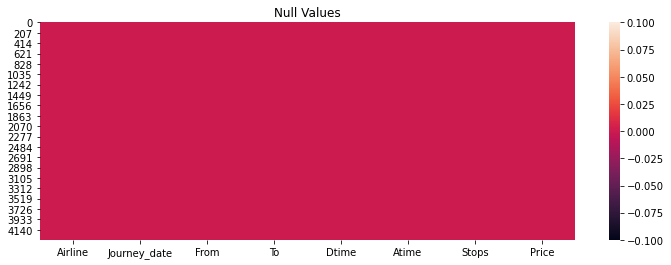

In [17]:
#Visualizeing null values:

plt.figure(figsize=[12,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

#### By visualization we can clearly say that there is no null values in the dataset.

In [18]:
#Checking for empty observations
df.loc[df['Price'] == " "]

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price


#### There is no empty observations in my target column.

# Feature Extraction:

In [19]:
#Converting object data type to datetime in Journey_date column 
df['Journey_date'] =  pd.to_datetime(df['Journey_date'])

#Extracting Journey year,month and day from Journey_date

#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.year

#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.month

#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.day

In [20]:
#Checking valuecount of Journey_year column
df.Journey_year.value_counts()

2022    4342
Name: Journey_year, dtype: int64

#### Since all the entries in Journey_year column are same let's drop as it will not help in our core analysis.

In [21]:
#Droping Journey_year column
df = df.drop(["Journey_year"],axis=1)


#Checking valuecount of Journey_mon column
df.Journey_mon.value_counts()

6     666
8     663
7     635
9     626
5     608
10    582
11    562
Name: Journey_mon, dtype: int64

#### Since all the entries in Journey_mon column are same let's drop as it will not help in our core analysis.

In [22]:
#Droping Journey_mon column
df = df.drop(["Journey_mon"],axis=1)


#Checking valuecount of Journey_year column
df.Journey_day.value_counts()

5    4342
Name: Journey_day, dtype: int64

#### Now Journey_day is ready for our analysis.

In [23]:
#Droping Journey_date column
df = df.drop(["Journey_date"],axis=1)

#### Dropping Journey_date column after extracting requered information.

In [24]:
#Converting object data type to datetime 
df['Dtime'] =  pd.to_datetime(df['Dtime'])
df['Atime'] =  pd.to_datetime(df['Atime'])


#Checking the data types of all columns again
df.dtypes

Airline                object
From                   object
To                     object
Dtime          datetime64[ns]
Atime          datetime64[ns]
Stops                  object
Price                  object
Journey_day             int64
dtype: object

In [25]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df["Dhour"]=pd.to_datetime(df["Dtime"]).dt.hour

#Extracting Hours
df["DMin"]=pd.to_datetime(df["Dtime"]).dt.minute


#Droping Dep_Time column after extraction
df = df.drop(["Dtime"],axis=1)

In [26]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["AHour"]=pd.to_datetime(df["Atime"]).dt.hour

#Extracting Hours
df["AMin"]=pd.to_datetime(df["Atime"]).dt.minute


#Droping Arrival_Time column after extraction
df = df.drop(["Atime"],axis=1)

In [27]:
#Checking the data types of all columns again
df.dtypes

Airline        object
From           object
To             object
Stops          object
Price          object
Journey_day     int64
Dhour           int64
DMin            int64
AHour           int64
AMin            int64
dtype: object

#### Datatypes after extraction and pre-processing.

In [28]:
#Checking description of data set
df.describe()

,Journey_day,Dhour,DMin,AHour,AMin
count,4342.0,4342.000000,4342.000000,4342.000000,4342.000000
mean,5.0,12.672962,27.394058,13.258637,29.094887
std,0.0,6.299805,17.453587,6.728187,17.707489
min,5.0,0.000000,0.000000,0.000000,0.000000
25%,5.0,7.000000,10.000000,8.000000,15.000000
50%,5.0,14.000000,30.000000,14.000000,30.000000
75%,5.0,18.000000,40.000000,19.000000,45.000000
max,5.0,23.000000,55.000000,23.000000,55.000000


### Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

# Visualization:


# Univariate Analysis:

In [29]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'From', 'To', 'Stops', 'Price']


In [30]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


## Univariate analysis for numerical columns:

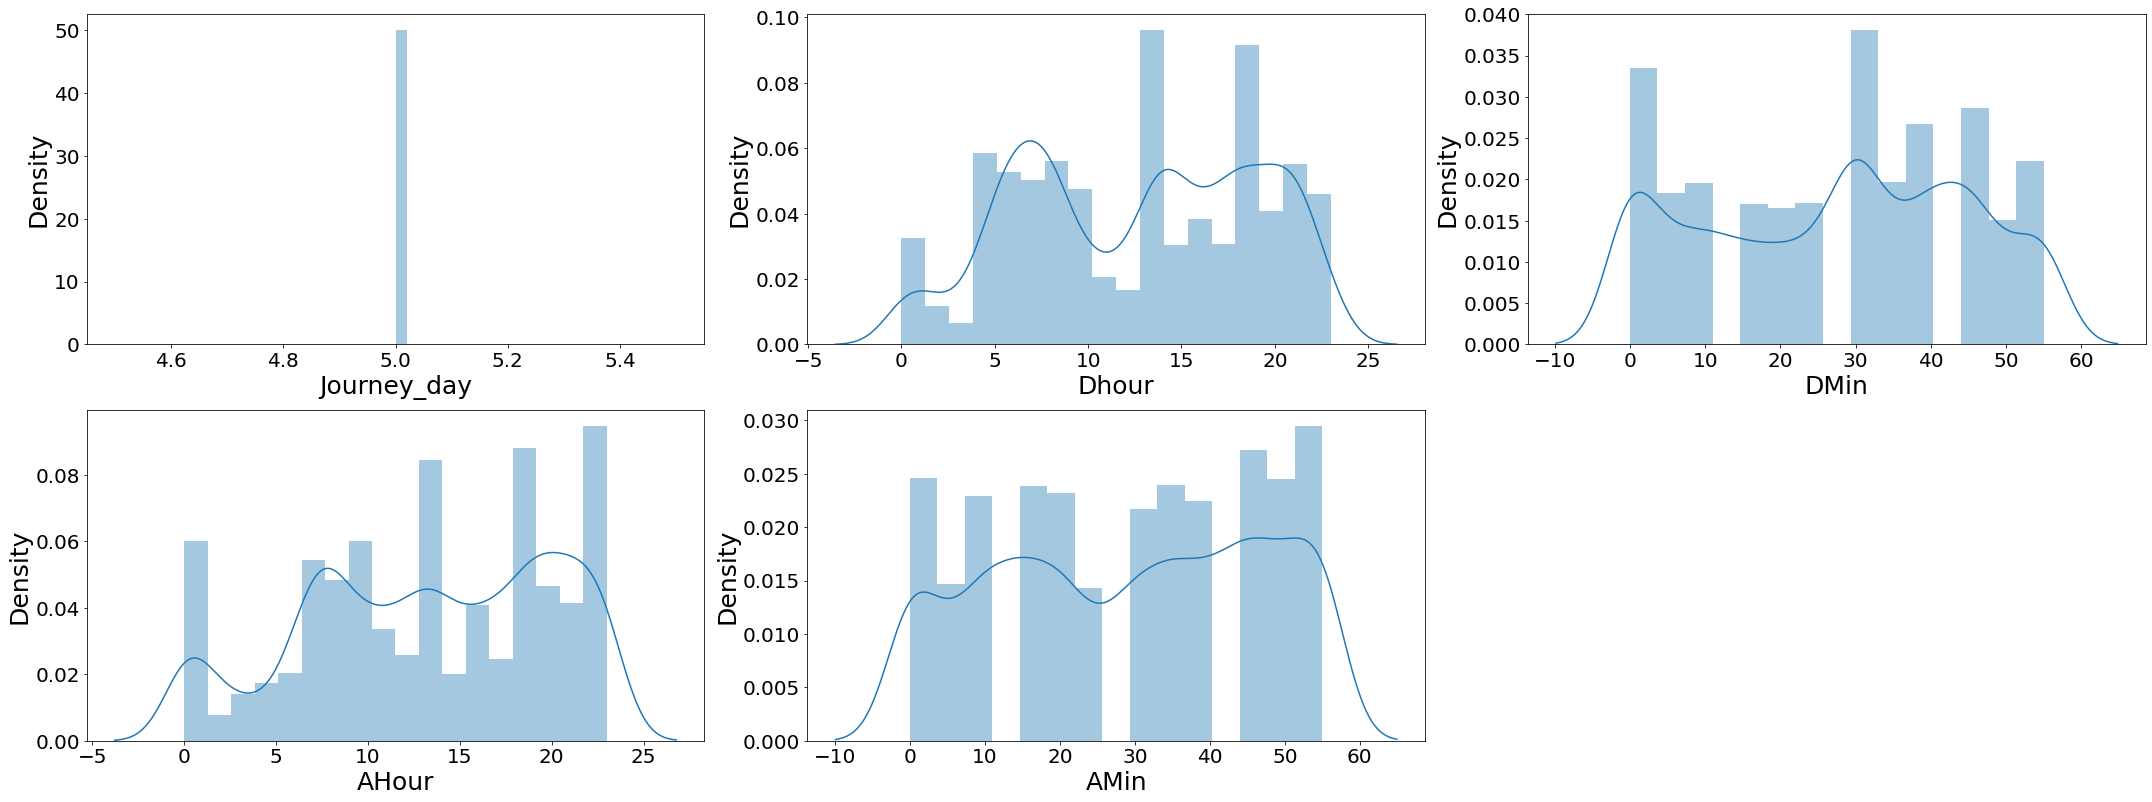

In [31]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,16))
sns.set_theme(style="whitegrid")
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Univariate Analysis for categorical columns:

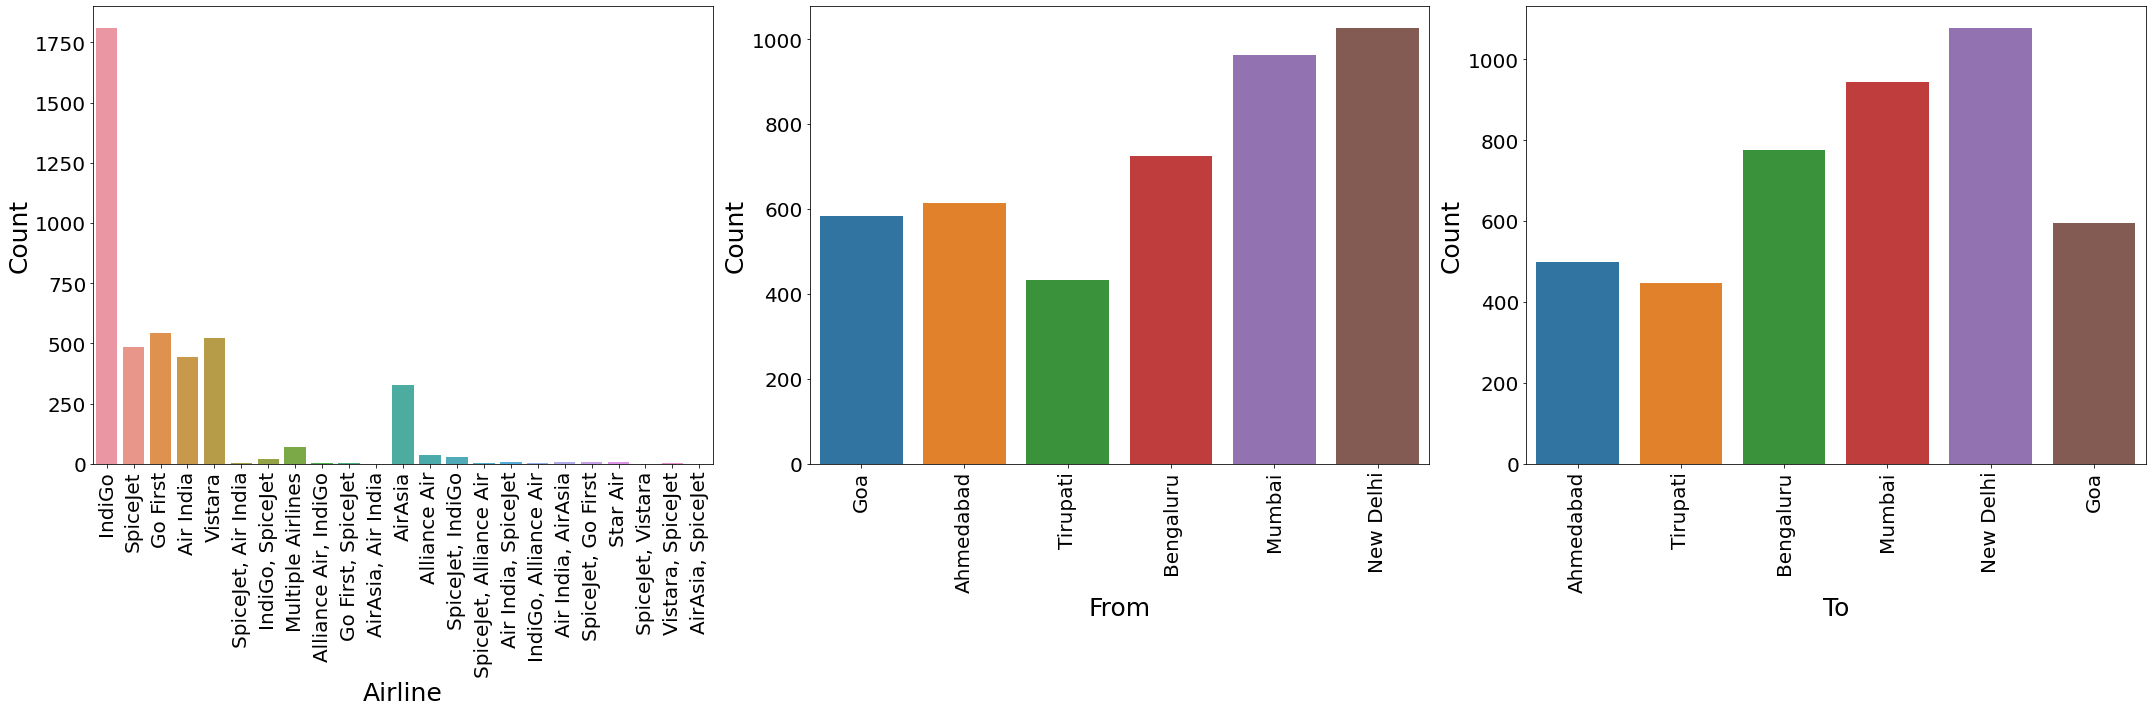

In [32]:
#Bar plot for all Categorical columns
plt.figure(figsize = (30,10))
sns.set_theme(style="whitegrid")
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

Indigo has maximum count which means most of the passengers preferred Indigo for there travelling.

New Delhi has maximum count for source which means maximum passengers are choosing New Delhi as there source.

New Delhi has maximum count for Destination which means maximum passengers are choosing New Delhi as there Destination.

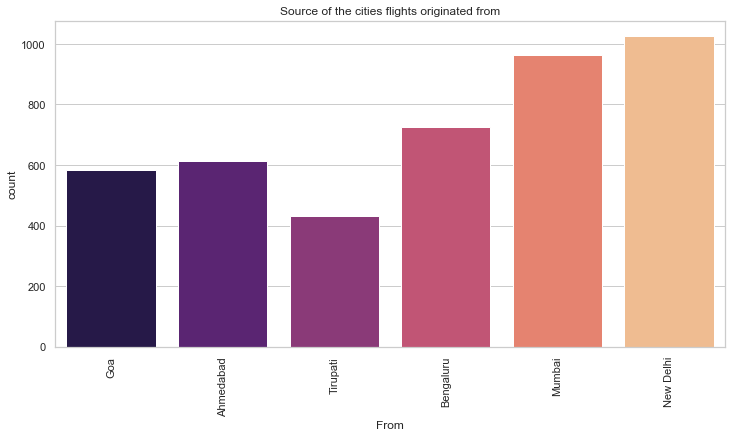

In [36]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("From", data=df, palette= "magma").set(title='Source of the cities flights originated from') 
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

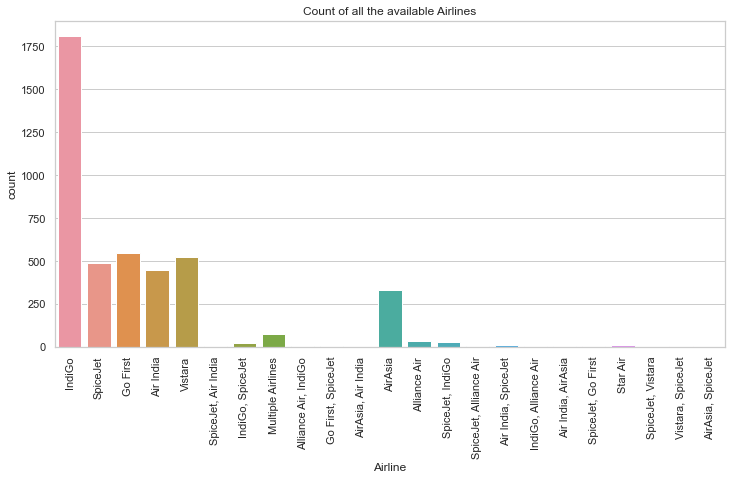

In [37]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Airline", data=df).set(title='Count of all the available Airlines') 
plt.xticks(rotation=90)
plt.show

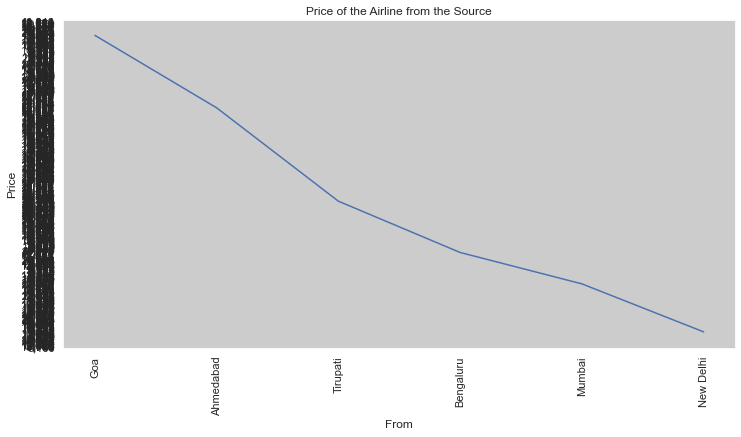

In [39]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="From", y="Price", ci=None).set(title='Price of the Airline from the Source')
plt.xticks(rotation=90)
plt.show()

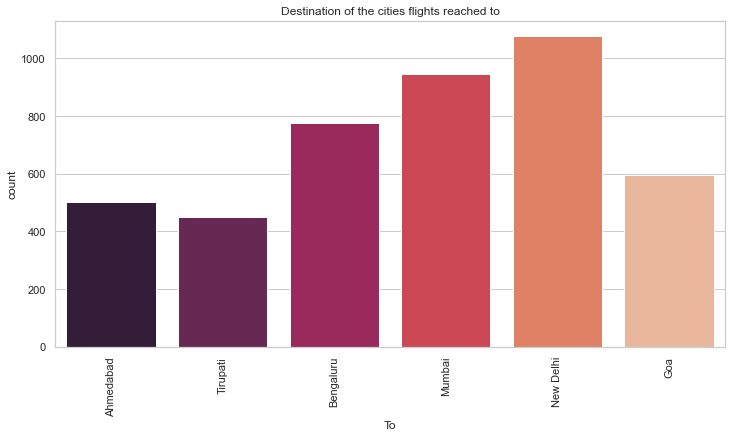

In [40]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("To", data=df, palette= "rocket").set(title='Destination of the cities flights reached to') 
plt.xticks(rotation=90)
plt.show()

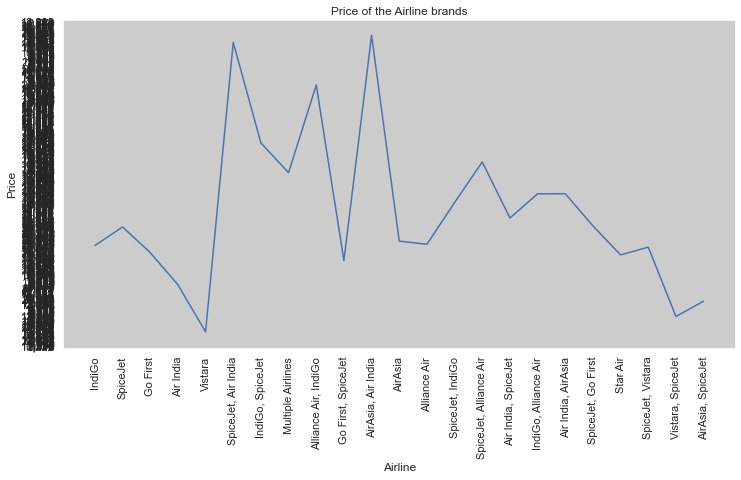

In [43]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Airline", y="Price", ci=None).set(title='Price of the Airline brands')
plt.xticks(rotation=90)
plt.show()

#### "Business Class" has a lot of additional benefits.An Economy class doesn't have much benefits and hence people prefer this more as it's relatively cheaper that other class.

### Plot shows us the number of stops given by flights
Majority of flights have "Non-stop or one stop" and this shows that flights have reached directly to the destination with more amout of time for halt.

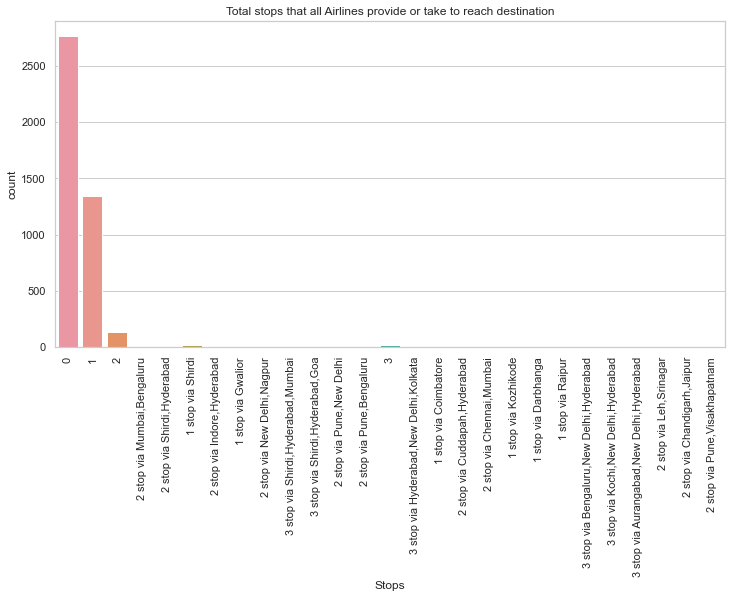

In [47]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot("Stops", data=df).set(title='Total stops that all Airlines provide or take to reach destination') 
plt.xticks(rotation=90)
plt.show()

Observations:

For Multiple Airlines the Price is high compared to other Airlines.

Taking Tirupati as Source costs highest Price Compared to other Source points.

Taking Tirupati as Destination costs highest Price Compared to other Destination points.

# Bivariate Analysis:


In [56]:
col=['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']

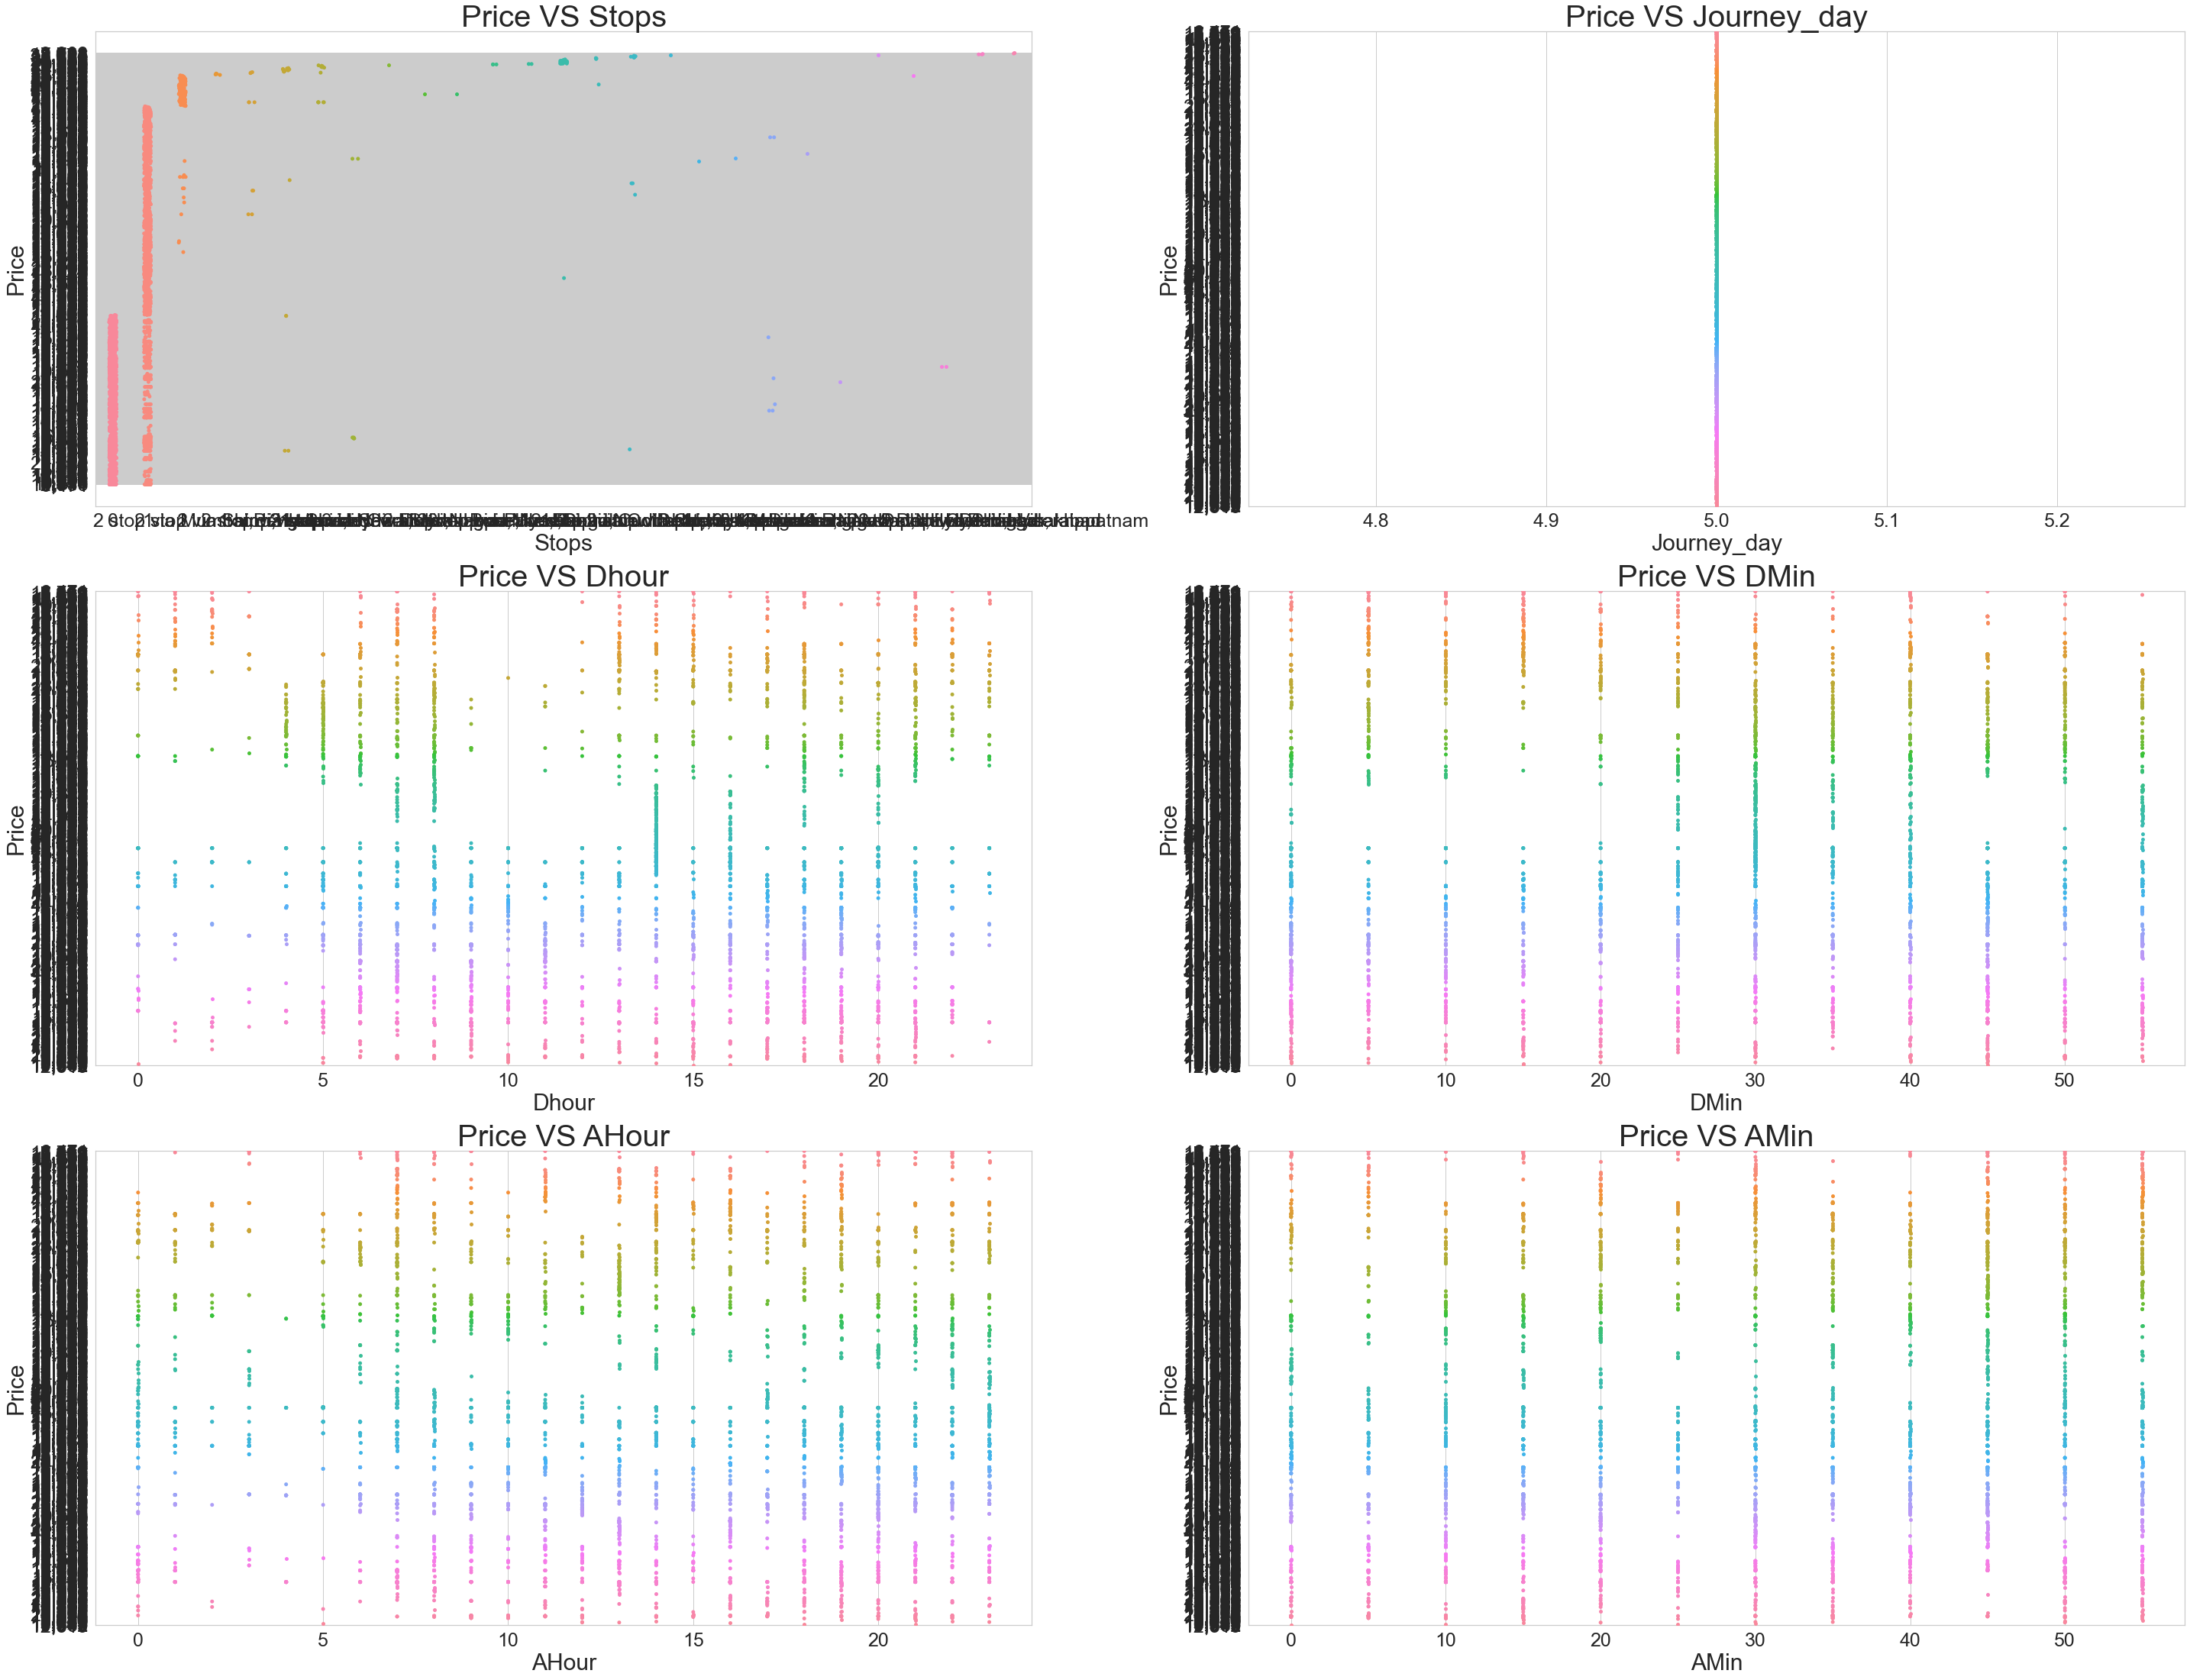

In [57]:
#stripplot for numerical columns
plt.figure(figsize=(40,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.stripplot(x=df[col[i]] , y=df['Price'])
    plt.title(f"Price VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

Observations:

Flights with 2 stops costs more price compared to other flights.

In all the dates the price is almost same.

At 2PM departure time of every day the flight Prices are high so it looks good to book flights rather than this departure time.

And Departure minute has less relation with target Price.

At 7AM to 1PM Arrival time of every day the flight Prices are high so it looks good to book flights rather than this arrival time.

And Arrival minute has less relation with target Price.

# Multivariate Analysis:

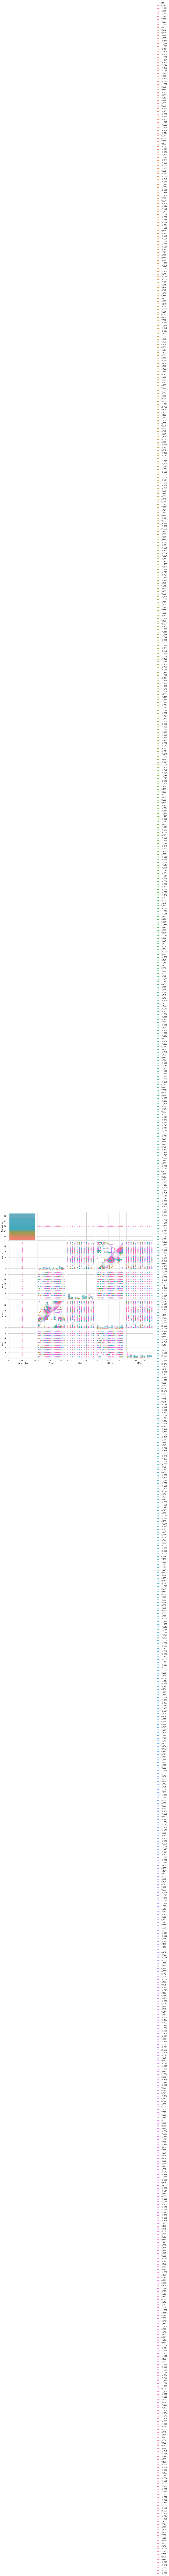

In [61]:
#pair ploting for df:
sns.pairplot(df, hue="Price", diag_kind="hist")


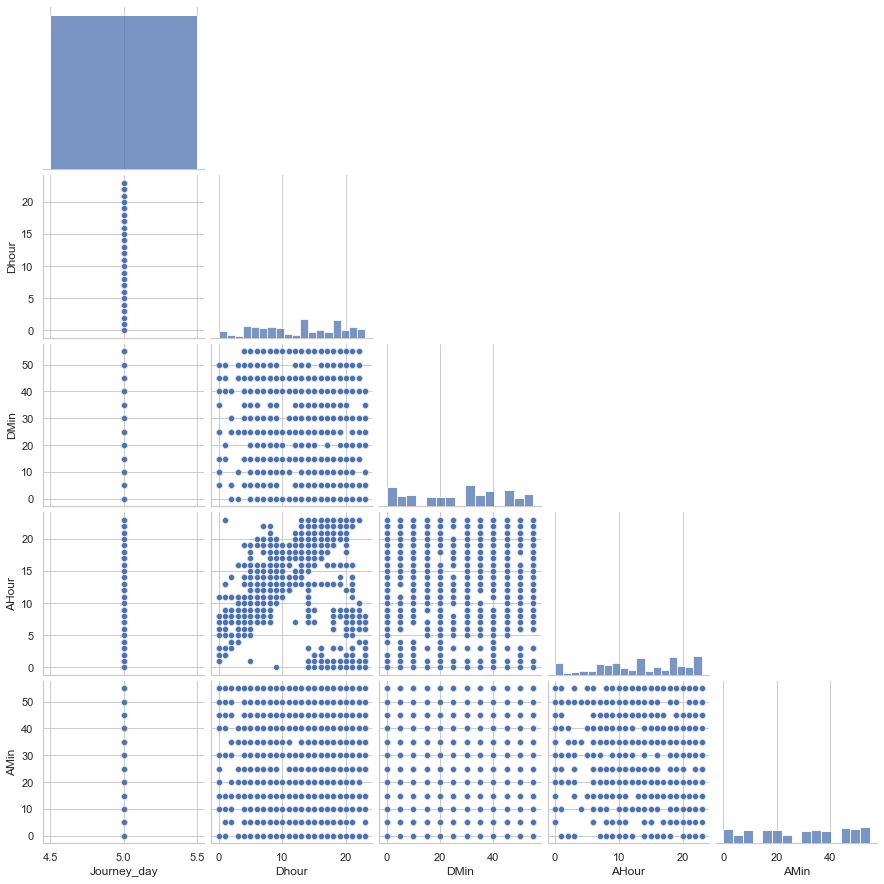

In [60]:
sns.pairplot(df, corner=True)

### Above are the pair plots of each pair of features.

# Checking for outliers:

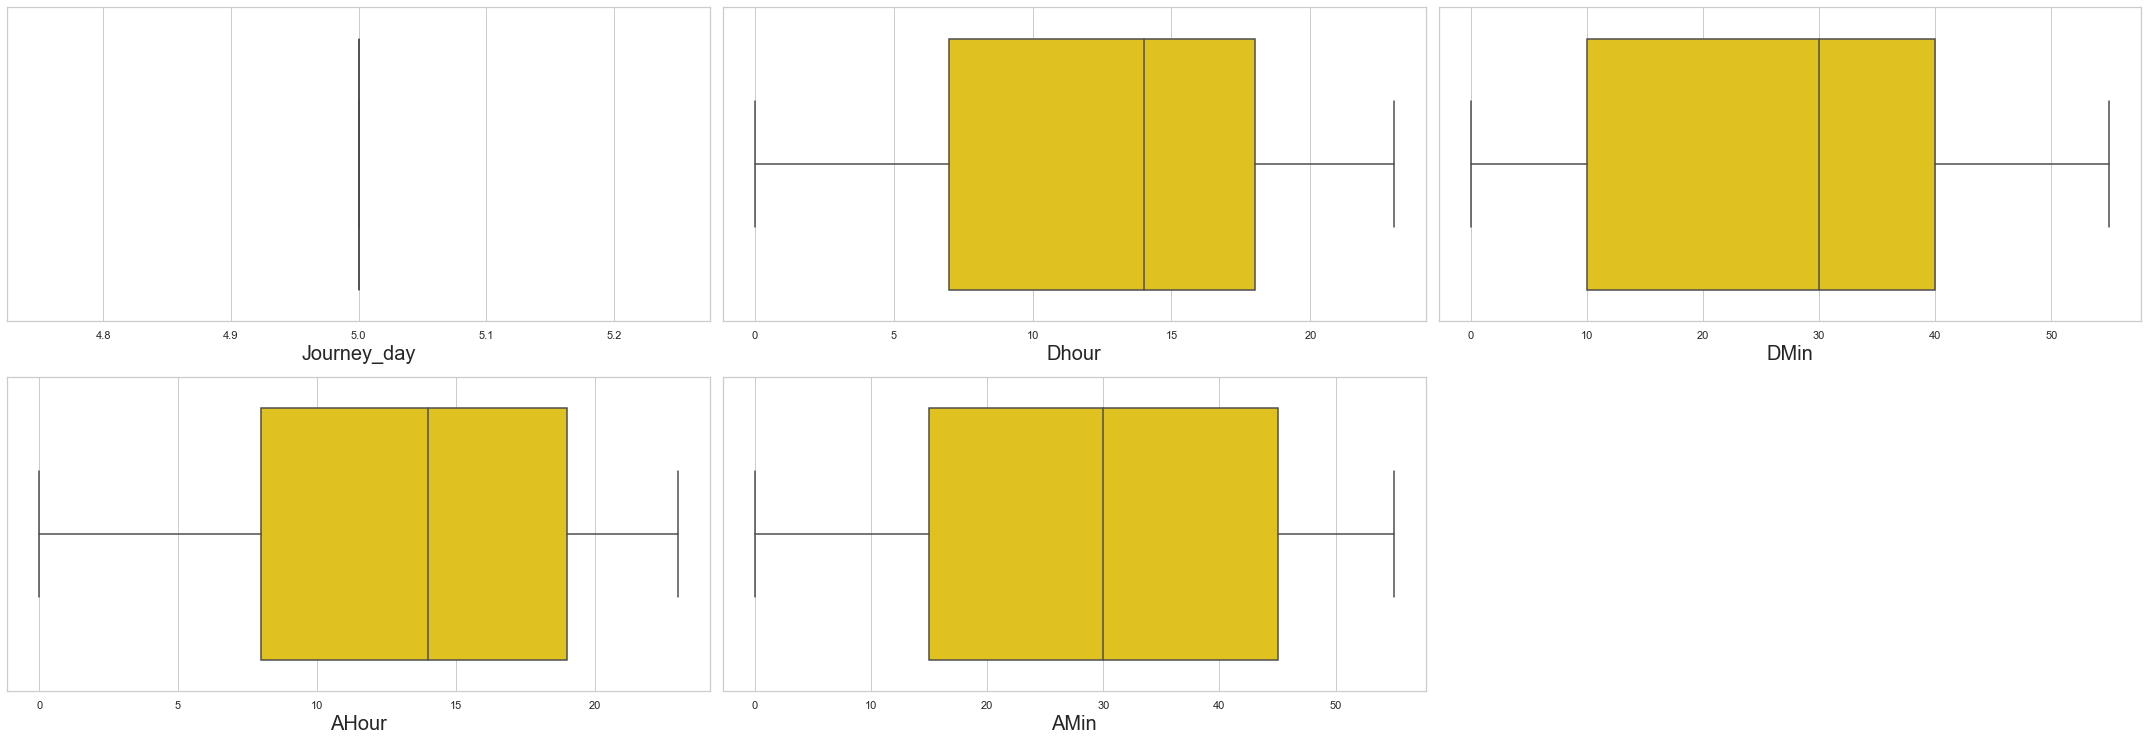

In [64]:
# Identifying the outliers using boxplot

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in

Stops

Price

Since Price is my target i should not remove outliers from this column.And Stops is a categorical column So i should not remove outliers here also.

# Checking for skewness:

In [65]:
#Checking for skewness
df.skew()

Journey_day    0.000000
Dhour         -0.155997
DMin          -0.122025
AHour         -0.310471
AMin          -0.117203
dtype: float64

#### There is skewness in Stops and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated. And Stops is categorical column so i should not remove skewness here also.

## Label Encoding:

In [66]:
# Separating categorical columns in df_1
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'From', 'To', 'Stops', 'Price']


In [69]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder

num= LabelEncoder()

label_col = ['Airline', 'From', 'To', 'Stops', 'Price']

for x in label_col:
    df[x] = num.fit_transform(df[x].astype(str))
    
df.head()

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
0,10,2,0,0,607,5,1,20,3,0
1,14,2,0,0,607,5,7,50,9,30
2,8,2,0,0,607,5,21,0,22,30
3,10,2,0,1,607,5,0,10,7,40
4,10,2,0,0,299,5,20,15,21,55


Using label encoder i have encoded the categorical columns.

[0.00049612 0.00052044 0.00042803 0.00028941 0.00034048 0.00142514
 0.00175103 0.00323697 0.00149324 0.00057881]
[  0.   94.7 189.4 284.1 378.8 473.5 568.2 662.9 757.6 852.3 947. ]


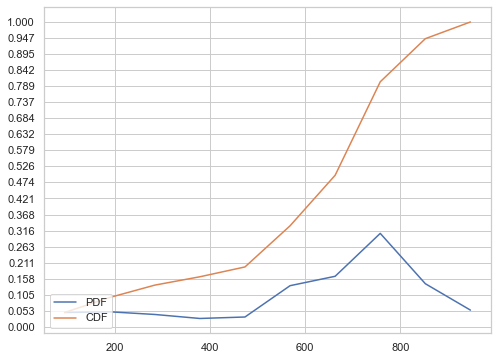

In [72]:
df_Price=df.loc[:,"Price"]
count,bin_edges=np.histogram(df_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

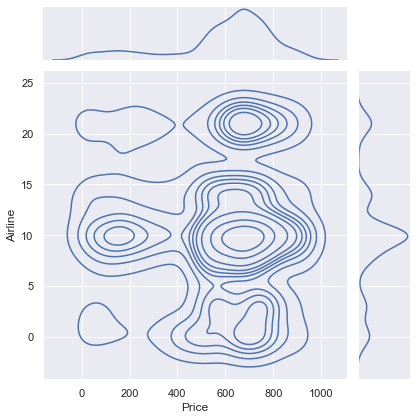

In [74]:
sns.set_style("darkgrid")
sns.jointplot("Price","Airline",data=df,kind="kde")
plt.show()

In [73]:
from scipy.stats import zscore

z_score = zscore(df[['Price','From','To']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]


# the data now seems much better than before.

df.describe()

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
count,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000,4342.0,4342.000000,4342.000000,4342.000000,4342.000000
mean,10.060341,2.543759,2.613772,0.870797,587.969369,5.0,12.672962,27.394058,13.258637,29.094887
std,5.673164,1.581626,1.549706,2.620271,217.019769,0.0,6.299805,17.453587,6.728187,17.707489
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,1.000000,0.000000,533.000000,5.0,7.000000,10.000000,8.000000,15.000000
50%,10.000000,3.000000,3.000000,0.000000,666.000000,5.0,14.000000,30.000000,14.000000,30.000000
75%,13.000000,4.000000,4.000000,1.000000,739.000000,5.0,18.000000,40.000000,19.000000,45.000000
max,22.000000,5.000000,5.000000,26.000000,947.000000,5.0,23.000000,55.000000,23.000000,55.000000


## Checking correlation using heat map:

In [81]:
#Droping Journey_date column
df = df.drop(["Journey_day"],axis=1)

In [82]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price      1.000000
Dhour      0.038150
DMin       0.001540
To        -0.005361
Airline   -0.010147
AMin      -0.010629
From      -0.011739
AHour     -0.032207
Stops     -0.235309
Name: Price, dtype: float64

Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

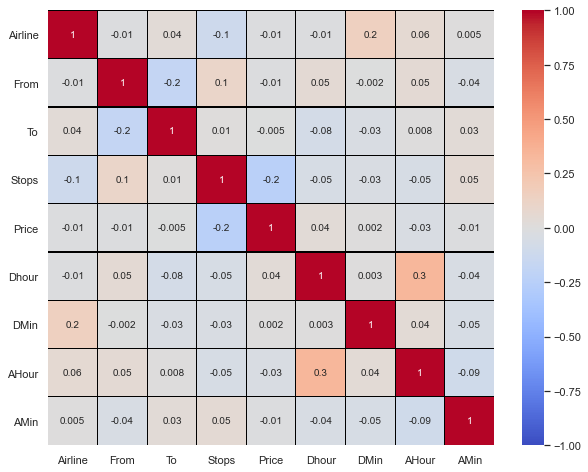

In [83]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue in any features.

AMin is very less correlated with target.

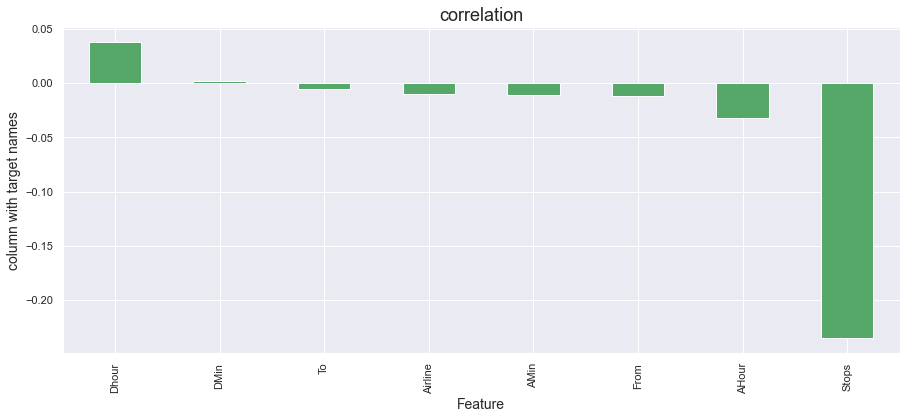

In [84]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

## Separating features and label in train dataset:

In [85]:
x = df.drop("Price",axis=1)
y = df["Price"]

## Scaling the data using standard scaler:

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X.head()

,Airline,From,To,Stops,Dhour,DMin,AHour,AMin
0,-0.010637,-0.343837,-1.686819,-0.332369,-1.853122,-0.423690,-1.524901,-1.643273
1,0.694518,-0.343837,-1.686819,-0.332369,-0.900602,1.295352,-0.633027,0.051121
2,-0.363215,-0.343837,-1.686819,-0.332369,1.321945,-1.569718,1.299365,0.051121
3,-0.010637,-0.343837,-1.686819,0.049315,-2.011875,-0.996704,-0.930319,0.615918
4,-0.010637,-0.343837,-1.686819,-0.332369,1.163192,-0.710197,1.150719,1.463115


## Checking for multicolinearity issue using VIF:

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.042265,Airline
1,1.052243,From
2,1.044459,To
3,1.032483,Stops
4,1.143451,Dhour
5,1.029570,DMin
6,1.151157,AHour
7,1.016721,AMin


There is no multicolinearity issue in this dataset.

## Finding Best Random State and Accuracy:

In [88]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.3026682423627076  on Random_state  165


In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)
# Created train test split.

## Regression Algorithms:

In [91]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

Model formation: 

### RandomForestRegressor:

In [92]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 29.65750427773456
mean_squared_error: 31591.02110057777
mean_absolute_error: 103.15642464378803
root_mean_squared_error: 177.73863142428482


### XGB Regressor:

In [93]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 27.094742323931786
mean_squared_error: 32741.96500905094
mean_absolute_error: 103.37346166074963
root_mean_squared_error: 180.94740951185497


### ExtraTreeRegressor:

In [94]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.26375560809119813
mean_squared_error: 33064.95153627447
mean_absolute_error: 101.90641000621278
root_mean_squared_error: 181.83770658550023


### Gradient Boosting Regressor:

In [95]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.3008831437059485
mean_squared_error: 31397.543024570532
mean_absolute_error: 118.02001670451159
root_mean_squared_error: 177.19351857381955


### DecisionTreeRegressor:

In [96]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.1651115977107519
mean_squared_error: 37495.082968742114
mean_absolute_error: 107.16853963381209
root_mean_squared_error: 193.6364711740588


### KNN: 

In [97]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.2157904306792776
mean_squared_error: 35219.08171910975
mean_absolute_error: 117.6096699923254
root_mean_squared_error: 187.66747645532445


### Bagging Regressor:

In [98]:
BG=BaggingRegressor()
BG.fit(X_train,y_train)
pred=BG.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.2688236799138286
mean_squared_error: 32837.342944563265
mean_absolute_error: 105.67662633946594
root_mean_squared_error: 181.21076939454582


In [100]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(DTR, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(RFR, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(ETR, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: -0.6010923527061461
Cross Validation score of RandomForestRegressor model is: -0.05210310066343948
Cross Validation score of ExtraTreesRegressor model is: -0.0950044636497368


In [103]:
scr = cross_val_score(GBR, x, y, cv=5)
print("Cross Validation score of GradientBoostingRegressor model is:", scr.mean())

scr = cross_val_score(BG, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of GradientBoostingRegressor model is: 0.005448226384941824
Cross Validation score of KNeighborsRegressor model is: -0.15181340162135082


### By looking into the model r2_score and error i found ExtraTreesRegressor as the best model with highest r2_score and least errors.

# Hyper Parameter Tuning:

In [105]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [118]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

Giving ETR parameters.

In [122]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(ExtraTreesRegressor(), parameter, cv=5, n_iter=10)

In [123]:
RCV.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [20, 40, 60, 80, 100],
                                        'n_jobs': [-2, -1, 1, 2]})

In [124]:
RCV.best_params_

{'n_jobs': -1,
 'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_features': 'log2'}

## New Model

In [125]:
Best_mod=ExtraTreesRegressor(max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=80,n_jobs=1)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 29.34568003118606
mean_squared_error: 31731.062284093347
mean_absolute_error: 104.17916475975738
RMSE value: 178.1321483733168


## Saving New Model:

In [126]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

## Predicting Flight Price for test dataset using Saved model of trained dataset:


In [127]:
# Loading the saved model
model=joblib.load("Flight_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([712.53      , 665.21583333, 693.325     , ..., 597.883125  ,
       653.6025    , 475.92125   ])

In [128]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302
Predicted,712.53,665.215833,693.325,864.360417,766.0,618.43,766.0,211.540208,685.4675,623.5,...,564.013735,649.212083,540.674554,716.104167,602.41875,653.75,612.875,597.883125,653.6025,475.92125
Actual,806.00,563.000000,669.000,70.000000,766.0,56.00,766.0,218.000000,380.0000,632.0,...,213.000000,702.000000,575.000000,900.000000,613.00000,597.00,613.000,624.000000,643.0000,544.00000


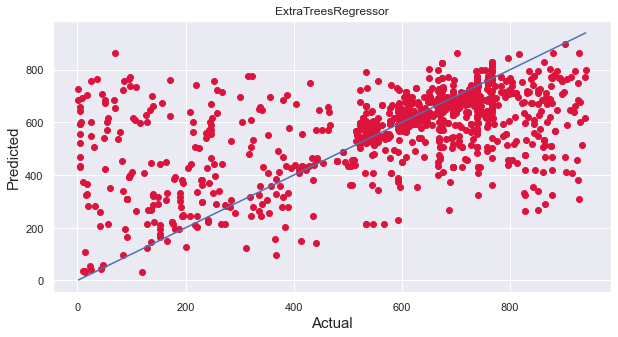

In [129]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

Due to the high complexity of the pricing models applied by the airlines, it is very difficult for a customer to purchase an air ticket at the lowest price, since the price changes dynamically. For this reason, several techniques ready to provide the proper time to the customer to buy an air ticket by predicting the airfare price, are proposed recently. The majority of those methods are making use of sophisticated prediction models from the computational intelligence research field known as Machine Learning (ML). In this machine learning in python project there is only one module namely, User. A traveller can access this module to get the future price prediction of individual airlines. The prediction will help a traveller to decide a specific airline as per his/her budget. Single entries of current or previous data can be made. This training set is used to train the algorithm for accurate predictions.